Exercise 2.1, Depth-first search revisited
=================

*This iPython notebook revisits material from the first week of the University of Twente Module 'Web Science', and further explains the Python syntax that was used in four subquestions. This way, you can check if you are up-to-date with the material. This exercise is not mandatory. If you think you do not need this exercise, either quickly finish it, or skip it all together and go directly to Exercise 2.2.*

Read the Wikipedia page on [Depth-first search][1], in particlar the example that contains the 
following undirected graph:

![Example graph][2]

In Python, an easy way to [represent a graph][3] is with the following data
structure, in which the graph is represented as a [dictionary][4] with a key for 
each node, where the value of each key is a [list][5] of connected nodes. This results in
the following representation of our example graph in Python:
(Note that each edge is encoded twice in the representation.
For instance the edge A -- B is encoded by having 'B' in the
list for the key 'A', and also having 'A' in the list for the key 'B'.)

[1]: https://en.wikipedia.org/wiki/Depth-first_search "Depth-first search"
[2]: https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Graph.traversal.example.svg/200px-Graph.traversal.example.svg.png "Example graph"
[3]: https://www.python.org/doc/essays/graphs/ "Python Patterns - Implementing Graphs"
[4]: https://docs.python.org/2/tutorial/datastructures.html#dictionaries "Python dictionaries"
[5]: https://docs.python.org/2/tutorial/datastructures.html#more-on-lists "More on Python lists"

In [4]:
graph = {'A': ['B', 'C', 'E'],
         'B': ['A', 'D', 'F'],
         'C': ['A', 'G'],
         'D': ['B'],
         'E': ['A', 'F'],
         'F': ['B', 'E'],
         'G': ['C'] }

Exercise 2.1.1: the recursive implementation
------------
From the pseudo code on Wikipedia, implement the *recursive* function 
``visited_nodes_dfs(G, start, discovered)`` 
that will be called with a graph ``G``, a start node ``start``, and a list
of nodes that are already discovered (``discovered``). 

In [5]:
def visited_nodes_dfs(G, start, discovered):
    # begin of solution
    discovered += [start]
    for w in G[start]:
        if (w not in discovered):
           visited_nodes_dfs(G, w, discovered)
    # end of solution
    return discovered

So, depth-first search starting at node 'A' is given by the following function call: (Tip: check the order of the nodes in the returned list with the correct order mentioned on Wikipedia.)

In [6]:
visited_nodes_dfs(graph, 'A', [])

['A', 'B', 'D', 'F', 'E', 'C', 'G']

Exercise 2.1.2: the iterative implementation
------------
From the pseudo code on Wikipedia, implement the *iterative* function 
``visited_nodes_dfs_iterative(G, start, discovered)`` that uses a stack.
Note that Python lists can be easily used as a stack too, as they implement
the special method pop() as follows ``stack.pop()``, whereas the standard
methods append() can be used for push as follows: ``stack.append()``.
 

In [7]:
def visited_nodes_dfs_iterative(G, start, discovered):
    # begin of solution
    stack = [start]
    while stack:
        v = stack.pop()
        if (v not in discovered):
            discovered += [v]
            stack += G[v]    # for w in G[v]: stack += [w]
    # end of solution
    return discovered


visited_nodes_dfs_iterative(graph, 'A', [])

['A', 'E', 'F', 'B', 'D', 'C', 'G']

Introducing NetworkX
------------
Standard functions that are often needed, like depth-first search, are provided in standard [python modules][1]. The module `networkx` implements many standard graph operations. You can save days of programming by spending a few hours reading the [NetworkX documentation][2]. (However, programming depth-first search *is* for educational purposes!). We import the module using the following command: (Tip: with `dir(networkx)` you get a list of all functions implemented by the module.)

[1]: https://docs.python.org/2/tutorial/modules.html "Python Modules"
[2]: http://networkx.github.io/documentation/networkx-1.10/ "NetworkX Documentation"

In [8]:
import networkx

Of course, a standard module should also use a standard format of graphs. Such a standard format enables us to exchange graphs with our friends, or share them on-line. One such a standard format for graphs is [DOT][1]. Let's use Python to write a DOT file of the example graph from Exercise 2.1.1, as follows:

*Tip: [Strings][2] can be surrounded in a pair of matching triple-quotes: """ or '''. End of lines do not need to be escaped when using triple-quotes, but they will be included in the string.* 

[1]: https://en.wikipedia.org/wiki/DOT_%28graph_description_language%29 "DOT on Wikipedia"
[2]: https://docs.python.org/2.7/tutorial/introduction.html#strings "Python strings"

In [16]:
dot_graph = """
strict graph G {
  A -- B; A -- C; A -- E;
  B -- D; B -- F;
  C -- G;
  E -- F;
}
"""

f = open('figure-example.dot', 'w') # open file for writing  
f.write(dot_graph)
f.close()

Now, let's open the DOT file with NetworkX, and assign it to the variable `G`:

*Tip: Read the [NetworkX Basics][3] completely before starting.*

**Beware:** *NetworkX supports 4 graph types: Graph, DiGraph, MultiGraph, and MultiDiGraph. Our graph should use a Digraph (a directed graph, a single edge between two nodes). The function `networkx.read_dot()` uses the MultiGraph or MultiDiGraph as its standard representation. To force the system in using a simple Graph, put the `read_dot()` statement inside the  `networkx.Graph()` statement as follows: 

[3]: http://networkx.github.io/documentation/latest/reference/introduction.html "NetworkX introduction"


In [13]:
G = networkx.Graph(networkx.read_dot('figure-example.dot'))

Let's introduce another module: `IPython`, which contains amongst others Python functions for displaying images. To display our graph we first have to transform it to another representation and assign it to the variable `viz` (In fact, this other representation is used by yet another the Python module, `pygraphviz`, but we do not need to worry about that).

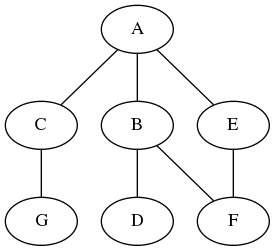

In [18]:
import IPython

viz = networkx.to_agraph(G)
viz.layout(prog='dot')
viz.draw('figure-example.png')

IPython.display.Image('figure-example.png')

Is this graph the same graph as the graph from the figure from Wikipedia? Explain your answer.


Exercise 2.1.3: the NetworkX implementation
------------
Search the NetworkX documentation (see the link above) for the depth-first search function. Use the preorder version of depth-first search on the graph `G` starting at node `'A'`. Insert your answer below:

In [ ]:
# begin of solution
networkx.dfs_preorder_nodes(G, 'A')
# end of solution

If all is well, you see a message like the following message: 

    <generator object <genexpr> at 0x7fa5a14a9f00>
    
where `0x7fa5a14a9f00` is some random (hexadecimal) number.

About Python generators
------------------------------
The people that programmed the NetworkX module have put a lot of effort in making its functions efficient, also if the graphs are really big. Most NetworkX functions therefore do *not* produce lists or graphs directly, but instead they produce [generator objects][1].

Generator objects do not actually contain a full data structure like a full list or a full graph. Instead, they contain code that will produce the next node of a list or a graph, one node at a time, each time we ask the generator object for the next node. This way, the system does not need to hold the full list in memory, and in many cases, the full list does not need to be generated, ever. 

Suppose we want to know if there is a path between node 'A' and 'G' in a graph. We might execute a depth first search, and loop over the result of depth first search (starting at 'A') until we find node 'G'. If indeed there is a path from 'A' to 'G', we can stop the algorithm and return True, otherwise we will return False. In pseudo code:

    1  procedure pathExists(G, v1, v2):
    2      for all nodes n in G.dfs(v1) do
    3          if n equals v2 then
    4              return True
    5      return False

to be called as `pathExists(G, 'A', 'G')`. The full depth first search (dfs) result is never created if `G.dfs()` produces a generator object (and there is a path between 'A' and 'G'). If `G.dfs()` produces the actual full list of nodes, then the algorithm still works (be it would be slower if there is indeed a path from 'A' to 'G'). Python objects that contain all data, and that allow looping over all items are called *iterators*.

[1]: https://docs.python.org/3/tutorial/classes.html#generators "Python Generators"

Exercise 2.1.4: iterators and generators
------------
To produce the actual data structure (list) from a generator, simply loop over the results using a [for statement][1] to produce the data structure (list). For advanced Python users: try to use [list comprehensions][2] to obtain compact and elegant code. Insert your answer below: 

[1]: https://docs.python.org/3/tutorial/controlflow.html#for-statements "For statements"
[2]: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions "List comprehensions"

In [ ]:
# begin of solution
[node for node in networkx.dfs_preorder_nodes(G, 'A')]
# end of solution

**Beware:** Once you looped over the results of a generator object, the results are no longer available. Whereas an iterator object can be re-used (we can iterate over it again and again), a generator object cannot be re-used.

## Exercise 2.1.5: copy by reference vs. deep copy

When you copy data in Python by assigning one variable to another, you are often not copying the data itself: You just copy the *reference* to the data. So, if you first copy the data (by reference), and then add something to the copy of the data (say, add an edge to a graph), then you are actually (also) adding the edge to the original data. Let's see this at work. Remove the `#` character below, so the edge `A -- Z` is added to the new graph `newG`:

In [ ]:
newG = G
#newG.add_edge('A', 'Z')


Now go to the figure just above Exercise 2.1.3, and re-run the IPython notebook cell by clicking control-shift.

**OUCH!** The figure for graph `G` changed too! To make a real copy that we can change without affecting the old graph, use the method [copy][1] of G to get a *deep* copy. Try it out, and check whether the figure above still changes or not.

*Tip: From the drop down menu of Jupyter use Cell and then Run All to rerun all statements in your notebook.*

[1]: http://networkx.github.io/documentation/latest/reference/generated/networkx.Graph.copy.html "Networkx Graph.copy" 